# STA 141B: Homework 6
## Wei-Kuang  (Jerry) Lin 

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

__library loading__

In [493]:
#### Making HTTP requests in Python
import requests
import requests_cache
requests_cache.install_cache('141B_hw6_cache_1225_2019')

#### Web scrapping
from bs4 import BeautifulSoup 

#### Regular express
import re 

#### Data processing
import numpy as np
import pandas as pd

#### Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#### Set up NLTK (Natural Language Toolkit) packages used by TextBlob
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("brown")
nltk.download("wordnet")
nltk.download("stopwords")

#### Natural Language Processing
from wordcloud import WordCloud, STOPWORDS                   # Text Visualization
from textblob import TextBlob                                # Processing textual data https://textblob.readthedocs.io/en/dev/
from nltk.corpus import stopwords                            # Removing Noisy words (preposition: by, in, of or Article: a,the  )
from nltk.corpus import wordnet                              # A dictionay to help you classify word into Verb, Noun Adj, or Adv
from sklearn.feature_extraction.text import TfidfVectorizer  # Term frequency-inverse document frequency

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


__Function: Extract all of the links to articles in an Aggie article list__

In [494]:
def get_link (url, page=1):
    '''
    Action: Extracts all of the links to articles in an Aggie article list
    Argument: "url" is string and "page" is integer
    Return: A list contains all links to articles on the requested page
    '''
    # concatenate a new url
    new_url= url + 'page'+ '/' + str(page) + '/' 
    # Load the webpage
    Web_req= requests.get(new_url)
    # Convert into texts
    Web_req_text = Web_req.text
    # Use BeautifulSoup to parse( organize) the raw webpage text using the 'lxml' library
    Web_BS= BeautifulSoup(Web_req_text, 'lxml')  
    # Extract the link
    h2 = Web_BS.find_all(name='h2',attrs={'class':'entry-title'}) 
    Link_list = [ i.find('a').get('href') for i in h2]
    # Output
    return(Link_list)

In [495]:
#### Function testing: Great! It works.
print(get_link('https://theaggie.org/sports/',1) )
print('\n')
print(get_link('https://theaggie.org/sports/',2) )

['https://theaggie.org/2019/12/10/the-marathon-vs-the-sprint/', 'https://theaggie.org/2019/12/09/aggies-lose-second-straight-at-golden-1-center/', 'https://theaggie.org/2019/12/06/unpredictable-season-reaches-finish-line-for-aggie-football/', 'https://theaggie.org/2019/12/03/aggies-take-wwpa-championship/', 'https://theaggie.org/2019/11/30/aggies-fall-late-in-causeway-classic-defeat/', 'https://theaggie.org/2019/11/27/aggies-ousted-from-ncaa-tournament/', 'https://theaggie.org/2019/11/26/ncaa-announces-plans-to-allow-college-athletes-to-profit-off-own-likeness/', 'https://theaggie.org/2019/11/22/womens-basketball-season-preview-3/', 'https://theaggie.org/2019/11/19/aggies-lament-missed-opportunities-in-home-finale-loss/', 'https://theaggie.org/2019/11/19/at-long-last-aggies-are-big-west-conference-champs/', 'https://theaggie.org/2019/11/15/ucd-mens-basketball-2019-20-season-preview/', 'https://theaggie.org/2019/11/15/player-spotlight-lauren-matias/', 'https://theaggie.org/2019/11/12/ag

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [496]:
# 1.2 function
def extracts(article_url):
    # Loading webpage
    Web_req= requests.get(article_url)
    Web_req_text = Web_req.text
    Web_BS= BeautifulSoup(Web_req_text, 'lxml')  

    #### Author
    try:
        My_Author = re.search('written by: (.*) ', Web_BS.text.lower() ).group(1)
        My_Author = re.sub('—', '', My_Author) 
    except: 
        My_Author ='Error in author extraction'

    #### Title 
    My_Title = Web_BS.find(name='h1', attrs={'class':'entry-title', 'itemprop':'headline'}).text

    #### Text 
    Text_BS = Web_BS.find(name='div', attrs={'class':'clearfix', 'itemprop':'articleBody'})
    # Removing punctuation and sign
    My_Text = ''
    punctuations = '''“”‘’!()-—[]{};:'"\,<>./?@#$%^&*_~'''
    for paragraph in Text_BS.find_all('p'):
        for char in paragraph.text :
            if char in punctuations:
                char = ''  
            My_Text = My_Text + char   
    # Replace '\xa0|\t' with ''    
    My_Text_Final =  re.sub('\xa0|\t', '', My_Text) 

    #### Make a dictionary to store Title, Text , and Author
    My_dictionary = {'Title':My_Title ,'Author': My_Author,'Text': My_Text_Final}
    
    #### Output
    return(My_dictionary)


#### Function testing: Great! It works.
article_url = 'https://theaggie.org/2019/12/02/reforestation-of-sugar-pine-trees-in-lake-tahoe-basin/'
extracts(article_url)

{'Author': 'husn kharabanda ',
 'Text': 'Planting genetically resilient forest in effort to battle forest fires climate changeTree populations in the Sierra Nevada area have seen a considerable decrease in health and density Between 2012 and 2016 the area lost more than 129 million trees Patricia Maloney UC Davis biologist and scientist in the UC Davis Department of Plant Pathology and Tahoe Environmental Research Center attributes this increased mortality  specifically of sugar pine trees  to a combination of drought and mountain pine beetle outbreakIn an effort to combat this rapid decline Maloney and a team of researchers collected seeds from 100 surviving trees in the Lake Tahoe basin to perform a sugar pine reforestation The project Maloney said originates from a question she asked her colleague Can we detect the genetic consequences of historical logging on sugar pine in the basinThe subsequent research conducted by her colleague Andrew Eckert a professor of biology at Virginia C

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

__Extract 60 Campus News__

In [497]:
#### Set the Campus's url 
url= 'https://theaggie.org/campus/'

#### Use my get_link() funciton to collect at least 50 links to articles
All_List = []
for i in range(7):
    Links = get_link(url, i+1)
    All_List = All_List + Links

#### Use my extracts() fucntion to extract title, author, text from each article
DF= pd.DataFrame()
for article_link in  All_List:
    dictionary = extracts(article_link)
    df = pd.DataFrame(dictionary, index= [0])
    DF = DF.append(df, ignore_index=True)

#### Create a new column at the 1st Col. to denote category
DF.insert(loc=0, column='Category', value ='Campus')
    
print(DF.shape)
print(DF.head())

#### Copy
DF_Campus = DF.copy()

(105, 4)
  Category                                     Author  \
0   Campus                             hannah holzer    
1   Campus                           jessica baggott    
2   Campus                      rebecca bihn-wallace    
3   Campus  rebecca bihn-wallace and jessica baggott    
4   Campus          ally russell  campus@theaggie.org   

                                                Text  \
0  Biden Sanders Warren Buttigieg Klobuchar Steye...   
1  ARU becomes the first union in the nation to r...   
2  Farrow praises student involvement in improvin...   
3  Senate approves bill to follow California publ...   
4  UC Davis Firearm Violence Research Center used...   

                                               Title  
0  Highlights from the last Democratic Debate of ...  
1  Academic Researchers United union reaches agre...  
2  Security Implementation Project includes moder...  
3  Senators debate, pass resolutions on animal ri...  
4  UC Davis secures state funding fo

__Extract 60 City News__

In [476]:
#### Set the Campus's url 
url= 'https://theaggie.org/city/'

#### Use my get_link() funciton to collect at least 50 links to articles
All_List = []
for i in range(7):
    Links = get_link(url, i+1)
    All_List = All_List + Links

#### Use my extracts() fucntion to extract title, author, text from each article
DF= pd.DataFrame()
for article_link in  All_List:
    dictionary = extracts(article_link)
    df = pd.DataFrame(dictionary, index= [0])
    DF = DF.append(df, ignore_index=True)

#### Create a new column at the 1st Col. to denote category
DF.insert(loc=0, column='Category', value ='City')
    
print(DF.shape)
print(DF.head())

#### Copy
DF_City = DF.copy()

(105, 4)
  Category                      Author  \
0     City            madeleine payne    
1     City  Error in author extraction   
2     City                tim lalonde    
3     City            madeleine payne    
4     City                   rui ding    

                                                Text  \
0  Earl EJ Thompson convicted for insurance fraud...   
1  Please signal when mergingNovember 15Bus merge...   
2  Proposed project would replace shops on Russel...   
3  Meetings will discuss Cannabis Land Use Ordina...   
4  New restaurant is still as busy as before incr...   

                                               Title  
0  Man who helped construct Tercero dorms sentenc...  
1                                        Police Logs  
2  Environmental Impact Report released regarding...  
3  Proposed cannabis ordinance addressed at commu...  
4                     Mikuni reopens after expansion  


__Merge two DataFrames__

In [498]:
DF_merged = DF_City.append(DF_Campus, ignore_index=True)
print(DF_merged.shape)
DF_merged.head()

(210, 4)


,Category,Author,Text,Title
0,City,madeleine payne,Earl EJ Thompson convicted for insurance fraud...,Man who helped construct Tercero dorms sentenc...
1,City,Error in author extraction,Please signal when mergingNovember 15Bus merge...,Police Logs
2,City,tim lalonde,Proposed project would replace shops on Russel...,Environmental Impact Report released regarding...
3,City,madeleine payne,Meetings will discuss Cannabis Land Use Ordina...,Proposed cannabis ordinance addressed at commu...
4,City,rui ding,New restaurant is still as busy as before incr...,Mikuni reopens after expansion


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

__Develope a function to natural language processing__

In [499]:
def lemmatization(text_input):
    """
    Argument:text_input is a string object
    Action: lemmatization
    Return: lemmatized text
    """
    # Convert to TextBlob object
    blob1 = TextBlob(text_input)
    # Removing stop words with NLTK in Python
    filtered_words = [w for w in blob1.words.lower() if not w in stopwords.words('english') and len(w) >1]
    filtered_sentence = ' '.join(filtered_words)


    # lemmatize: Convert the wrod into its lemma/ dictionary form
    # Also, Map Brown to WordNet tag
    blob2 = TextBlob(filtered_sentence)

    Out= []
    My_dictionay = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}

    for x in blob2.pos_tags:
        Brown_pos_tag = x[1]              # x[1] select the Tagging
        First_Letter = Brown_pos_tag[0]   # The first Letter of Brown.pos.tag is Wordnet.pos.tag

        #### Map to WordNet POS tag
        WordNet_pos_tag = My_dictionay.get( First_Letter, wordnet.NOUN )  # if not matching, then return wordnet.NOUN
        #### Append
        Out = Out + [WordNet_pos_tag]

    WORDNET_POS_TAG = Out

    # Now pair the Word and its WordNet.tag. 
    # lemmatize: let's use string.lemmatize( word net tag )
    Word_lemma = [w.lemmatize(t) for w,t in zip( blob2.words , WORDNET_POS_TAG) ]
    lemmatized_sentence = ' '.join(Word_lemma)
    
    # Output
    return(lemmatized_sentence)

In [500]:
#### Function testing
campus_title = np.array ( DF_merged.Title[DF_merged.Category == 'Campus'] )
print(lemmatization(campus_title[0]))
print(lemmatization(campus_title[1]))

highlight last democratic debate year
academic researcher unite union reach agreement uc


__Do city articles typically cover different topics than campus articles?__

* ANS:
Topics that campus news covers the most including administration, school police, mental-related topics, student life, and tuition. Common words in city news title are Davis, police, logs, Sacramento, council, community and so forth.  City news focus more on the policy but Campus focus more on student-related topics.

Term Frequency of Campus titles
     Freq      Word
469    38        uc
131    27     davis
436    18   student
65     15     asucd
93     13    campus
402    11    senate
155     9  election
297     8       new
275     7   meeting
504     7      year


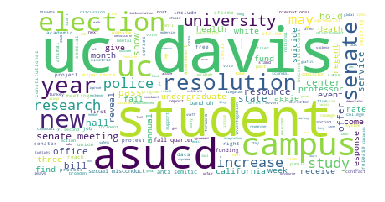

In [501]:
# Documents of campus titles
campus_title = DF_merged.Title[DF_merged.Category == 'Campus']
lemmatized_campus_title =  [lemmatization(x) for x in campus_title]

#### Term Freq - titles
bolb = TextBlob( ' '.join(lemmatized_campus_title))
dictionary = bolb.word_counts
df = pd.DataFrame(dictionary, index= [0]).T
df.columns = ['Freq']
df['Word'] = df.index

print('Term Frequency of Campus titles')
print(df.reset_index(drop= True).sort_values('Freq', axis=0, ascending=False).head(10) )

#### Visualization
wc = WordCloud(background_color="white").generate( ' '.join(lemmatized_campus_title) )
plt.imshow(wc)
plt.axis('off')
plt.show()

Term Frequency of City titles
     Freq        Word
86     30       davis
201    19      police
164    14         log
61      9        city
79      7      county
307     6        yolo
69      5   community
52      5  california
254     4       state
123     4        fire


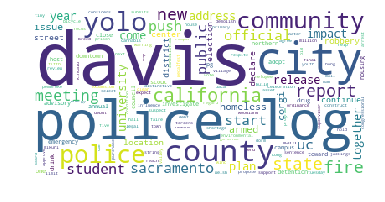

In [502]:
# Documents of city titles
campus_title = DF_merged.Title[DF_merged.Category == 'city']
lemmatized_city_title =  [lemmatization(x) for x in city_title]

#### Term Freq - titles
bolb = TextBlob( ' '.join(lemmatized_city_title))
dictionary = bolb.word_counts
df = pd.DataFrame(dictionary, index= [0]).T
df.columns = ['Freq']
df['Word'] = df.index

print('Term Frequency of City titles')
print(df.reset_index(drop= True).sort_values('Freq', axis=0, ascending=False).head(10) )

#### Visualization
wc = WordCloud(background_color="white").generate( ' '.join(lemmatized_city_title) )
plt.imshow(wc)
plt.axis('off')
plt.show()

__What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?__

In [512]:
#### Prepare the input
my_doc = [ lemmatization(text) for text in DF_merged.Text]

In [517]:
#### TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()  
tf_idf = vectorizer.fit_transform(my_doc)  
  
    #### place tf-idf values in a pandas data frame
    # DF = pd.DataFrame(tf_idf.todense(), columns=vectorizer.get_feature_names()) 
    # .todense() convert sparse to dense matrix

#### Similarity matrix     
similarity = tf_idf @ tf_idf.T
similarity= similarity.todense()
similarity

matrix([[1.        , 0.02636519, 0.05155091, ..., 0.05733086, 0.04044649,
         0.02930714],
        [0.02636519, 1.        , 0.01404407, ..., 0.01380282, 0.00739265,
         0.01297628],
        [0.05155091, 0.01404407, 1.        , ..., 0.04695312, 0.05764629,
         0.03512506],
        ...,
        [0.05733086, 0.01380282, 0.04695312, ..., 1.        , 0.08446089,
         0.04301675],
        [0.04044649, 0.00739265, 0.05764629, ..., 0.08446089, 1.        ,
         0.03222376],
        [0.02930714, 0.01297628, 0.03512506, ..., 0.04301675, 0.03222376,
         1.        ]])

In [518]:
# Find multiple maximum values in a matrix
# https://stackoverflow.com/questions/20825990/find-multiple-maximum-values-in-a-2d-array-fast

def K_largest_coordinates( matrix , k):
    """nlargest_indices finds the k-th largest values in a matrix and then returns the coordinates 
        Arg: arr is the array, n is the threshold
        Return: it returns coordinates which are the pair of documents
    """
    # Make the diagonal as 0
    np.fill_diagonal(matrix, 0)
    
    # Make the upper tri as 0
    matrix *= np.tri(*matrix.shape)
    matrix
    
    # Algorithms to find the top K pairs of most similar articles
    uniques = np.unique(matrix)
    sort = -np.sort(-uniques)  # descending order in np.sort
    sort = sort.A1 # numpy.A1 returns a flatten vector/array
    threshold = sort[k-1]
    threshold
    X,Y = np.where(matrix >= threshold)
    Result = [p for p in zip(X,Y)]
    return(Result)

In [519]:
K_largest_coordinates(similarity, 3)

[(108, 0), (134, 0), (134, 1)]

In [527]:
selection= [i in [0,1,134,108] for i in list(DF_merged.index)]
DF_merged[['Category','Title']][selection]
for i in DF_merged.Title[selection]:
    print(i)

Man who helped construct Tercero dorms sentenced to 10 years in prison
Police Logs
Senators debate, pass resolutions on animal rights, Hong Kong at Nov. 6 meeting
Resolution in support of student debt cancellation bill passed at Oct. 24 Senate meeting


__Let's use WordCloud to check the common terms in these articles __

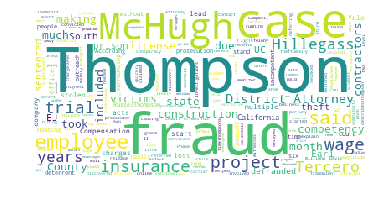

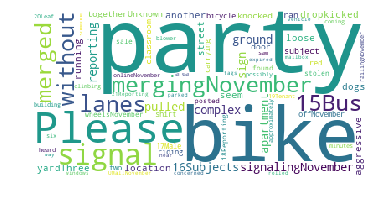

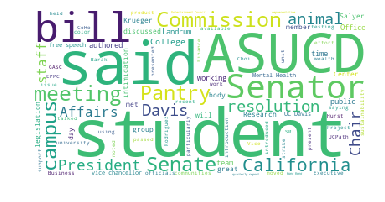

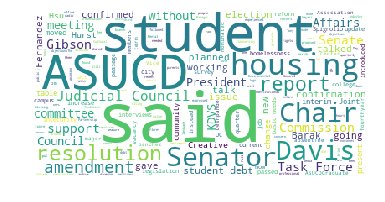

In [524]:
wc = WordCloud(background_color="white").generate(DF_merged.Text[0])
plt.imshow(wc)
plt.axis('off')
plt.show()

wc = WordCloud(background_color="white").generate(DF_merged.Text[1])
plt.imshow(wc)
plt.axis('off')
plt.show()

wc = WordCloud(background_color="white").generate(DF_merged.Text[108])
plt.imshow(wc)
plt.axis('off')
plt.show()

wc = WordCloud(background_color="white").generate(DF_merged.Text[134])
plt.imshow(wc)
plt.axis('off')
plt.show()

 *ANS: These articles are similar. Their common themes are mentioning the police to help a particular subject

__ANS to 1.4.3 Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.__

Ideally, if time allows, I would do web scraping in different categories, and then evaluate the similarity between news(campus and city) and other categories. The similarity matrix will reveal whether this corpus(news - campus and city) is representative of the Aggie.

Without this information, I would guess that this corpus might be representative of the Aggie. Because our corpus is from news category. It this section is expected to cover most of the events in other category. For example, an art festival event might be on art category but also on the news. Similarly, if UC Davis wins any sport game, the news and sports categories should both report similar topics on this event.

However, my guess can be wrong. By the current corpus I have, the inference I could make is that the news category covers the topics related to mental-related topics, student life, and tuition, according to the 1.4.1 information.